In [57]:
import pandas as pb 
import numpy as np
from matplotlib.pyplot import plot_date
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import CategoricalNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score

In [58]:
data = pb.read_excel("/Users/jonathanmata/Documents/Ai_Project/Combined Data with averages.xlsx")

x= data.loc[:,('HW Average','PJ01 ','EX 01','Quiz Average')]

x['HW Average']=x['HW Average']*5

grade = data['Grade']

finalGrade = data['Final']

X_train, X_test,Y_train,Y_test = train_test_split(x,grade,random_state=42,test_size=.30)

In [59]:
cCNB = CategoricalNB(alpha=0.5)
cCNB.fit(X_train,Y_train)
preCa = cCNB.predict(X_test)

how_good = accuracy_score(Y_test,preCa)
print(how_good)

0.6444444444444445


In [60]:
neigh = KNeighborsClassifier(n_neighbors=8, weights='distance',metric='euclidean')
neigh.fit(X_train,Y_train)
prediction = neigh.predict(X_test)
neigh_score=accuracy_score(prediction,Y_test)
print(neigh_score)

0.6888888888888889


In [61]:
X_train, X_test,Y_train,Y_test = train_test_split(x,finalGrade,random_state=42,test_size=.30)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

le2=LinearRegression().fit(X_train_scaled,Y_train)

prediction2 = le2.predict(X_test_scaled)

# Calculate R-squared (coefficient of determination)
r_squared = r2_score(Y_test, prediction2)

print("R-squared (Coefficient of determination):", r_squared)

R-squared (Coefficient of determination): 0.896970592138638


In [62]:
# encode the letter grades 
coded_Grades = grade.apply(lambda char: 1 if char == 'F' else 0).tolist()

X_train, X_test,Y_train,Y_test = train_test_split(x,coded_Grades,random_state=42,test_size=.30)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

finalLR = LogisticRegression(random_state=0,C=1).fit(X_train_scaled,Y_train)
y_pred = finalLR.predict(X_test_scaled)

# Calculate accuracy
accuracy = accuracy_score(Y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9111111111111111


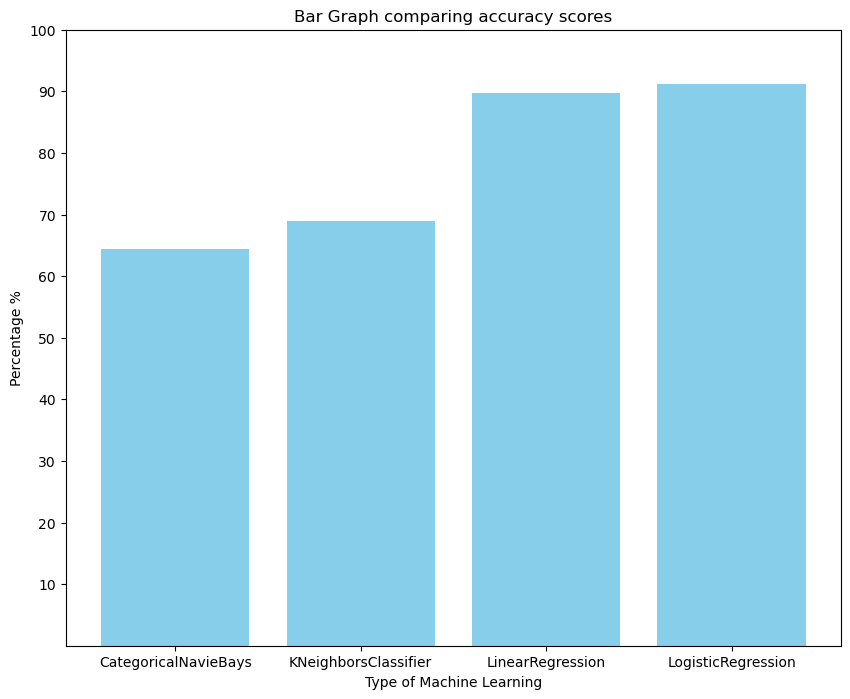

In [67]:
import matplotlib.pyplot as plt

# Sample data (four different numbers)
numbers = [how_good*100, neigh_score*100, r_squared*100, accuracy*100]
labels = ['CategoricalNavieBays', 'KNeighborsClassifier', 'LinearRegression', 'LogisticRegression']  # Labels for the x-axis (optional)

# Create a bar graph
plt.figure(figsize=(10, 8))  # Adjust the figure size (width, height)
plt.bar(labels, numbers, color='skyblue')  # Create the bar chart
plt.yticks([10,20,30,40,50,60,70,80,90,100])
# Add labels and title
plt.xlabel('Type of Machine Learning')  # Label for the x-axis
plt.ylabel('Percentage %')      # Label for the y-axis
plt.title('Bar Graph comparing accuracy scores')  # Title of the graph

# Display the plot
plt.show()